In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


(-0.5, 27.5, 27.5, -0.5)

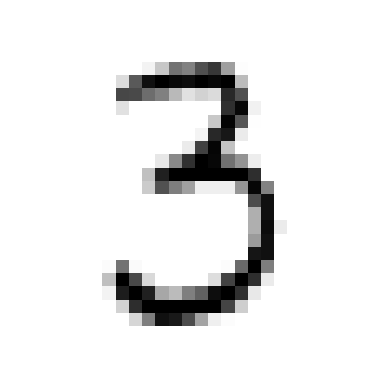

In [3]:
single_img = X_train[50]
plt.imshow(single_img,cmap = 'gray_r')
plt.axis('off')

In [9]:
X_train.shape

(60000, 28, 28)

In [31]:
# reshaping to 2d array
x_train_flat = X_train.reshape(-1, 28  * 28  )
x_test_flat = X_test.reshape(-1, 28  * 28)

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler  = MinMaxScaler()

In [54]:
normalised_xtrain = scaler.fit_transform(x_train_flat)
normalised_xtest = scaler.transform(x_test_flat)

In [55]:
x_train = normalised_xtrain.reshape(-1,28,28,1)
x_test = normalised_xtest.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

(-0.5, 27.5, 27.5, -0.5)

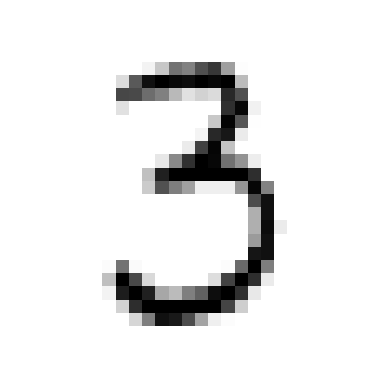

In [56]:
plt.imshow(x_train[50],cmap = 'gray_r')
plt.axis('off')

In [57]:
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [58]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [59]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (4,4),input_shape = (28,28,1),activation  = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
model.compile(loss = "categorical_crossentropy",optimizer = 'rmsprop',metrics = ['accuracy'])

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               589952    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [61]:
model.fit(x_train,y_train_categorical,epochs=1)

1875/1875 [==============================] - 36s 19ms/step - loss: 0.1434 - accuracy: 0.9569


In [62]:
model.evaluate(x_test,y_test_categorical)

313/313 [==============================] - 2s 6ms/step - loss: 0.0571 - accuracy: 0.9810


[0.05708865821361542, 0.9810000061988831]

In [63]:
prediction = model.predict(x_test)
prediction_class = np.argmax(prediction,axis = 1)
prediction_class

313/313 [==============================] - 3s 8ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test,prediction_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.95      1.00      0.97       892
           6       1.00      0.96      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [68]:
model.save('mnist_classification_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [70]:
from keras.models import load_model
loaded_model = load_model('mnist_classification_1.h5')
np.argmax(loaded_model.predict(x_test),axis = 1)

313/313 [==============================] - 2s 6ms/step


array([7, 2, 1, ..., 4, 5, 6])